In [1]:
import csv
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('機器學習期末kkbox.csv', index_col=0)
df_test = pd.read_csv('機器學習期末kkbox_test.csv', index_col=0)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.head()

,artist_name,bd,city,composer,expiration_date,expiration_date_month,expiration_date_new,expiration_date_year,genre_ids,index,...,source_system_tab_search,source_system_tab_settings,source_system_tab_nan,registered_via_13,registered_via_16,registered_via_3,registered_via_4,registered_via_7,registered_via_9,registered_via_nan
0,3784,0,0,16653,2017-10-05,10,1507132800,2017,307,0,...,0,0,0,0,0,0,0,1,0,0
1,5190,0,0,9701,2017-10-05,10,1507132800,2017,2,1,...,0,0,0,0,0,0,0,1,0,0
2,9451,0,0,63665,2017-10-05,10,1507132800,2017,97,2,...,0,0,0,0,0,0,0,1,0,0
3,35336,0,0,67752,2017-10-05,10,1507132800,2017,2,3,...,0,0,0,0,0,0,0,1,0,0
4,25764,0,0,60377,2017-10-05,10,1507132800,2017,371,4,...,0,0,0,0,0,0,0,1,0,0


In [4]:
id_test = pd.read_csv('test_ids_df.csv', index_col=0)
id_test.head()

,id
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0


In [5]:
df.shape

(7370601, 37)

In [6]:
df_test.shape

(2556790, 36)

# 評估方法def

In [7]:
#confusion matrix
from sklearn.metrics import confusion_matrix
#ROC & AUC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

def evaluate_model(predicted, actual):
    
    # Table-Type Plotting
    #print('Confusion Matrix:\n{}'.format(confusion_matrix(predicted, actual)))
    print('Classification Report:\n{}'.format(classification_report(predicted, actual)))
    print('Accuracy: {}'.format(accuracy_score(predicted, actual)))
    print('Precision: {}'.format(precision_score(predicted, actual)))
    print('Recall: {}'.format(recall_score(predicted, actual)))
    print('F-1: {}'.format(f1_score(predicted, actual)))
    print('AUC: {}'.format(roc_auc_score(predicted, actual)))    
        
    # ROC Curve Plotting
    fpr, tpr, thresh = roc_curve(actual, predicted)
    roc_auc = roc_auc_score(predicted, actual)    
    plt.title('ROC')
    plt.plot(fpr, tpr, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    print('Confusion Matrix:\n{}'.format(confusion_matrix(predicted, actual)))
    tp, fp, fn, tn  = confusion_matrix(actual, predicted).ravel()
    print("True positives: " + str(tp))
    print("False positives: " + str(fp))
    print("True negatives: " + str(tn))
    print("False negatives: " + str(fn))
    print('\n')

In [8]:
#confusion matrix
from sklearn.metrics import confusion_matrix

def printCM(y,y_pred):
    print('Confusion Matrix:\n{}'.format(confusion_matrix(y, y_pred)))
    tp, fp, fn, tn  = confusion_matrix(y, y_pred).ravel()
    print("True positives: " + str(tp))
    print("False positives: " + str(fp))
    print("True negatives: " + str(tn))
    print("False negatives: " + str(fn))
    print('\n')

# 訓練/測試資料切割

In [9]:
df_x = df.drop(["target",'registration_init_time','expiration_date'], axis = 1)
df_y = df['target']
df_y = pd.DataFrame(df_y)

X = df_x.iloc[:,:].values
y = df_y.iloc[:,-1].values

In [10]:
len(df_x.columns)

34

In [11]:
df_x.columns

Index(['artist_name', 'bd', 'city', 'composer', 'expiration_date_month',
       'expiration_date_new', 'expiration_date_year', 'genre_ids', 'index',
       'language', 'lyricist', 'msno', 'registration_init_time_month',
       'registration_init_time_new', 'registration_init_time_year', 'song_id',
       'song_length', 'source_screen_name', 'source_system_tab_discover',
       'source_system_tab_explore', 'source_system_tab_listen with',
       'source_system_tab_my library', 'source_system_tab_notification',
       'source_system_tab_radio', 'source_system_tab_search',
       'source_system_tab_settings', 'source_system_tab_nan',
       'registered_via_13', 'registered_via_16', 'registered_via_3',
       'registered_via_4', 'registered_via_7', 'registered_via_9',
       'registered_via_nan'],
      dtype='object')

In [12]:
df_x_test = df_test.drop(['registration_init_time','expiration_date'], axis = 1)
X_ = df_x_test.iloc[:,:].values

In [13]:
df_x_test.columns

Index(['artist_name', 'bd', 'city', 'composer', 'expiration_date_month',
       'expiration_date_new', 'expiration_date_year', 'genre_ids', 'index',
       'language', 'lyricist', 'msno', 'registration_init_time_month',
       'registration_init_time_new', 'registration_init_time_year', 'song_id',
       'song_length', 'source_screen_name', 'source_system_tab_discover',
       'source_system_tab_explore', 'source_system_tab_listen with',
       'source_system_tab_my library', 'source_system_tab_notification',
       'source_system_tab_radio', 'source_system_tab_search',
       'source_system_tab_settings', 'source_system_tab_nan',
       'registered_via_13', 'registered_via_16', 'registered_via_3',
       'registered_via_4', 'registered_via_7', 'registered_via_9',
       'registered_via_nan'],
      dtype='object')

In [14]:
len(df_x_test.columns)

34

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)#,random_state=3)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


all_test_std = sc.transform(X_)

In [16]:
X.shape

(7370601, 34)

In [17]:
X_.shape

(2556790, 34)

In [18]:
print(np.any(np.isnan(X_)))
print(np.all(np.isfinite(X_)))

False
True


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [20]:
from sklearn.tree import DecisionTreeClassifier

# DecisionTree Classifier

## max_depth

In [20]:
model = DecisionTreeClassifier()
random = np.arange(10,60,10)

f1score = []
acc = []

for n in random:
    model.set_params(max_depth = n, splitter = 'random')
    model.fit(X_train_std, y_train)
    pred_y_test = model.predict(X_test_std)
    f1score.append(round(f1_score(y_true = y_test, y_pred = pred_y_test, average='weighted'),3))
    acc.append(round(accuracy_score(y_test, pred_y_test),3))
    
    print(round(accuracy_score(y_test, pred_y_test),3))

0.626
0.661
0.671
0.665
0.657


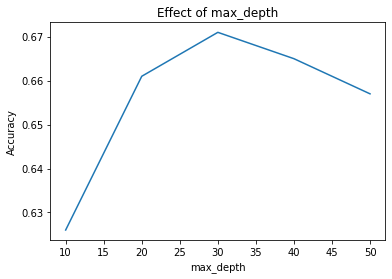

In [21]:
plt.title("Effect of max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.plot(random, acc)

### max_depth = 30

In [27]:
dt = DecisionTreeClassifier(max_depth = 30, splitter = 'random')

dt.fit(X_train_std, y_train)
pred_y_test = dt.predict(X_test_std)
print(dt.score(X_train_std, y_train))

0.838033344833334


Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.66      0.67   1098566
         1.0       0.67      0.69      0.68   1112615

    accuracy                           0.68   2211181
   macro avg       0.68      0.68      0.68   2211181
weighted avg       0.68      0.68      0.68   2211181

Accuracy: 0.6771245773186365
Precision: 0.6741164663370203
Recall: 0.693655037906194
F-1: 0.6837461981910788
AUC: 0.6770188775059741


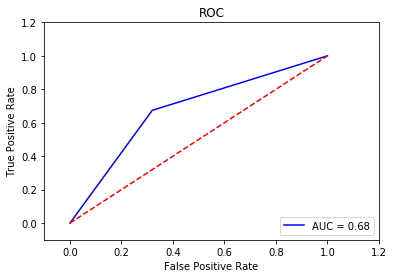

Confusion Matrix:
[[725474 373092]
 [340844 771771]]
True positives: 725474
False positives: 340844
True negatives: 771771
False negatives: 373092




In [28]:
evaluate_model(y_test, pred_y_test)

In [29]:
pred_result = dt.predict(all_test_std)
update = pd.DataFrame({'id':id_test['id'],
                       'target':pred_result})
update['id'] = update['id'].apply(lambda x:int(x))
update.set_index("id" , inplace=True)
update.head()
print(update.shape)

(2556790, 1)


In [31]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [30]:
update.to_csv('submission_decisiontree調參1.csv')

## min_samples_leaf

In [32]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
random = np.arange(1,31,5)

f1score = []
acc = []

for n in random:
    model.set_params(max_depth = 30, splitter = 'random', min_samples_leaf = n)
    model.fit(X_train_std, y_train)
    pred_y_test = model.predict(X_test_std)
    f1score.append(round(f1_score(y_true = y_test, y_pred = pred_y_test, average='weighted'),3))
    acc.append(round(accuracy_score(y_test, pred_y_test),3))
    
    print(round(accuracy_score(y_test, pred_y_test),3))

0.675
0.687
0.689
0.688
0.685
0.683


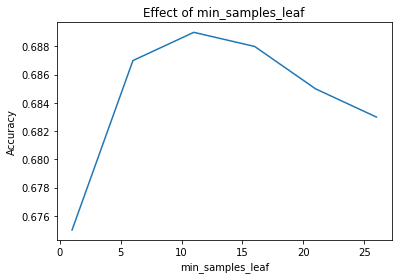

In [33]:
plt.title("Effect of min_samples_leaf")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.plot(random, acc)

### min_samples_leaf = 11

In [34]:
dt = DecisionTreeClassifier(max_depth = 30, splitter = 'random', min_samples_leaf = 11)

dt.fit(X_train_std, y_train)
pred_y_test = dt.predict(X_test_std)
print(dt.score(X_train_std, y_train))

0.7324660523857333


Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.70      0.69   1098566
         1.0       0.69      0.67      0.68   1112615

    accuracy                           0.69   2211181
   macro avg       0.69      0.69      0.69   2211181
weighted avg       0.69      0.69      0.69   2211181

Accuracy: 0.6857416918832063
Precision: 0.6941122239683869
Recall: 0.6712753288424118
F-1: 0.6825027962774785
AUC: 0.6858341933507377


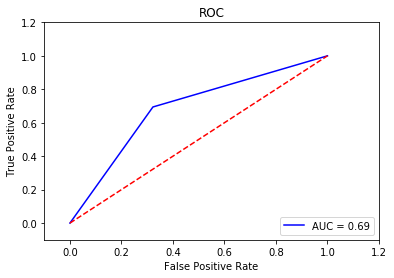

Confusion Matrix:
[[769428 329138]
 [365744 746871]]
True positives: 769428
False positives: 365744
True negatives: 746871
False negatives: 329138




In [35]:
evaluate_model(y_test, pred_y_test)

In [36]:
pred_result = dt.predict(all_test_std)
update = pd.DataFrame({'id':id_test['id'],
                       'target':pred_result})
update['id'] = update['id'].apply(lambda x:int(x))
update.set_index("id" , inplace=True)
update.head()
print(update.shape)

(2556790, 1)


In [37]:
update.to_csv('submission_decisiontree調參2.csv')

## max_features

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
random = np.arange(3,34,5)

f1score = []
acc = []

for n in random:
    model.set_params(max_depth = 30, splitter = 'random', min_samples_leaf = 11, max_features = n)
    model.fit(X_train_std, y_train)
    pred_y_test = model.predict(X_test_std)
    f1score.append(round(f1_score(y_true = y_test, y_pred = pred_y_test, average='weighted'),3))
    acc.append(round(accuracy_score(y_test, pred_y_test),3))
    
    print(round(accuracy_score(y_test, pred_y_test),3))

0.629
0.666
0.672
0.682
0.688
0.686
0.682


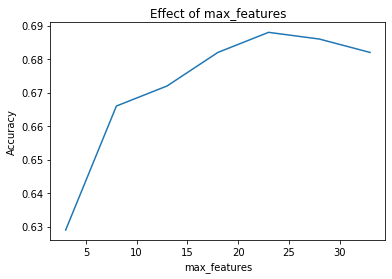

In [23]:
plt.title("Effect of max_features")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.plot(random, acc)

### max_features = 33

In [21]:
dt = DecisionTreeClassifier(max_depth = 30, splitter = 'random', min_samples_leaf = 11, max_features = 33)

dt.fit(X_train_std, y_train)
pred_y_test = dt.predict(X_test_std)
print(dt.score(X_train_std, y_train))

0.7370049346631986


Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.69      0.69   1097155
         1.0       0.69      0.68      0.68   1114026

    accuracy                           0.69   2211181
   macro avg       0.69      0.69      0.69   2211181
weighted avg       0.69      0.69      0.69   2211181

Accuracy: 0.6858041019708473
Precision: 0.6922969673287507
Recall: 0.6774868809166034
F-1: 0.6848118608850297
AUC: 0.6858680491052112


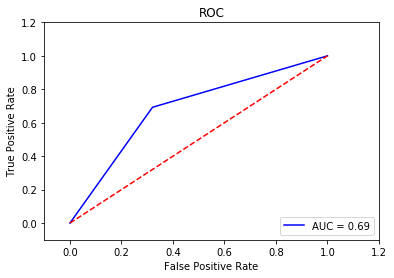

Confusion Matrix:
[[761699 335456]
 [359288 754738]]
True positives: 761699
False positives: 359288
True negatives: 754738
False negatives: 335456




In [22]:
evaluate_model(y_test, pred_y_test)

In [26]:
pred_result = dt.predict_proba(all_test_std)

In [27]:
pred_list = pred_result.tolist()
pred_ = []
for i in range(len(pred_list)):
    pred_.append(pred_list[i][-1])
print(len(pred_))

2556790


In [28]:
update = pd.DataFrame({'id':id_test['id'],
                       'target':pred_})
update['id'] = update['id'].apply(lambda x:int(x))
update.set_index("id" , inplace=True)
update.head()
print(update.shape)

(2556790, 1)


In [30]:
update.to_csv('submission_decisiontree調參3.csv')

## min_samples_split

In [46]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
random = np.arange(2,53,10)

f1score = []
acc = []

for n in random:
    model.set_params(max_depth = 30, splitter = 'random', min_samples_leaf = 11, max_features = 33, min_samples_split = n)
    model.fit(X_train_std, y_train)
    pred_y_test = model.predict(X_test_std)
    f1score.append(round(f1_score(y_true = y_test, y_pred = pred_y_test, average='weighted'),3))
    acc.append(round(accuracy_score(y_test, pred_y_test),3))
    
    print(round(accuracy_score(y_test, pred_y_test),3))

0.684
0.686
0.685
0.686
0.686
0.684


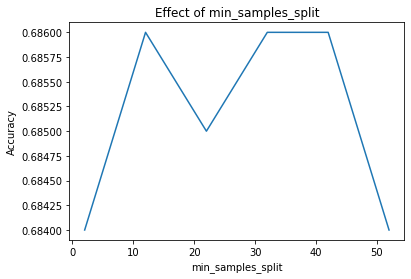

In [47]:
plt.title("Effect of min_samples_split")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.plot(random, acc)

### min_samples_split = 12

In [48]:
dt = DecisionTreeClassifier(max_depth = 30, splitter = 'random', min_samples_leaf = 11, max_features = 33, min_samples_split =12 )

dt.fit(X_train_std, y_train)
pred_y_test = dt.predict(X_test_std)
print(dt.score(X_train_std, y_train))

0.7395459179520179


Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.70      0.69   1098566
         1.0       0.70      0.68      0.69   1112615

    accuracy                           0.69   2211181
   macro avg       0.69      0.69      0.69   2211181
weighted avg       0.69      0.69      0.69   2211181

Accuracy: 0.6898119149902247
Precision: 0.697184185452472
Recall: 0.6780422697878422
F-1: 0.6874800084932579
AUC: 0.6898871729835763


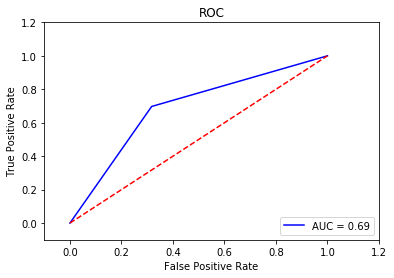

Confusion Matrix:
[[770899 327667]
 [358215 754400]]
True positives: 770899
False positives: 358215
True negatives: 754400
False negatives: 327667




In [49]:
evaluate_model(y_test, pred_y_test)

In [50]:
pred_result = dt.predict(all_test_std)
update = pd.DataFrame({'id':id_test['id'],
                       'target':pred_result})
update['id'] = update['id'].apply(lambda x:int(x))
update.set_index("id" , inplace=True)
update.head()
print(update.shape)

(2556790, 1)


In [51]:
update.to_csv('submission_decisiontree調參4.csv')